In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [13]:
# load dataset as pandas dataframe
df = pd.read_excel('Base de Dados_Glauco_JP-organizados.xlsx','sequencial')
df.head(3)

,Distance,Station,Period,River type,Sector,Week,Month/Year,year,Al(dis),Al(tot),...,P(sed),Mn(sed),Clay,Silt,sandVF,sandF,sandM,sandC,sandVC,Q
0,-19.2,PT-52,Dry Season,Principal,Upstream,14,2019-04-03,2019,0.041871,1.069429,...,198.0,395.0,0.0,93.0,97.0,237.0,362.0,199.0,12.0,32.360
1,-19.2,PT-52,Dry Season,Principal,Upstream,15,2019-04-10,2019,0.123471,1.408143,...,99.4,436.0,0.0,101.0,81.0,242.0,353.0,206.0,17.0,37.270
2,-19.2,PT-52,Dry Season,Principal,Upstream,16,2019-04-17,2019,0.079400,2.120429,...,666.0,2290.0,40.0,766.0,122.0,63.0,9.0,0.0,0.0,46.154


In [14]:
df= df.query('Period =="Dry Season" & Sector =="Anomalous"')
numerofig =3
#df
dados_pca= df.dropna().loc[:, 'Al(dis)':]

dados_pca.head(3)

,Al(dis),Al(tot),As(tot),Pb(dis),Pd(tot),Fe(dis),Fe(tot),P(dis),P(tot),Mn(dis),...,P(sed),Mn(sed),Clay,Silt,sandVF,sandF,sandM,sandC,sandVC,Q
76,0.172486,1.061857,0.001130,0.005,0.005000,0.624000,2.771429,0.017173,0.029371,0.116857,...,556.0,11205.0,114.0,521.0,224.0,71.00,25.00,24.00,21.00,32.360
77,0.091743,1.485714,0.001341,0.005,0.005000,2.953714,0.563714,0.016981,0.028871,0.074400,...,2333.0,5871.0,334.0,645.0,21.0,0.03,0.03,0.03,0.03,37.270
78,0.321086,2.185714,0.001553,0.005,0.006214,4.871429,0.060714,0.025721,0.051643,0.123843,...,1103.0,9348.0,247.0,731.0,22.0,0.03,0.03,0.03,0.03,46.154


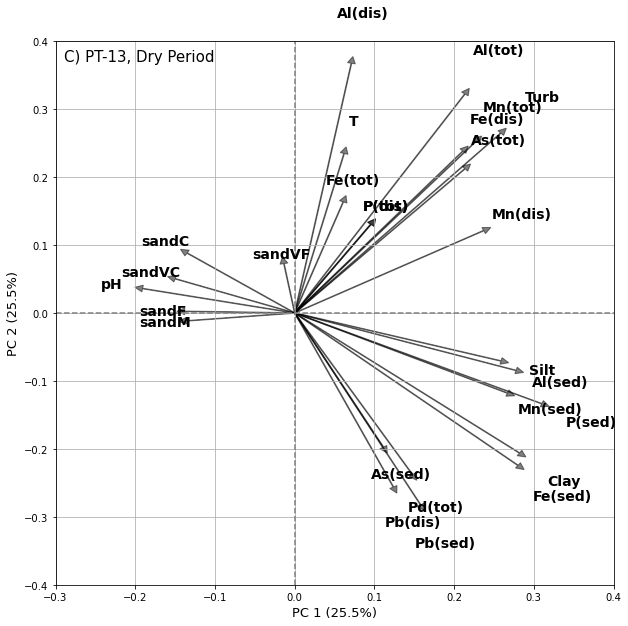

In [18]:

X = dados_pca.loc[:, :'sandVC']
y= dados_pca['Q']
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    plt.figure(figsize=(10,10))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    #plt.scatter(xs * scalex,ys * scaley, c = y) # desligando os pontos
    plt.scatter(x=[1,1], y=[2,2]) # qqer valor
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],
                  color = 'black',
                  alpha = 0.5,
                  head_width=0.01,
                  head_length=0.01)
        if labels is None:
            #plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
            plt.text(coeff[i,0]* 1.2, coeff[i,1] * 1.2, dados_pca.columns[i], color = 'k', ha = 'center', va = 'center',fontsize=14, weight='bold')
            
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    
    plt.xlim(-.3,.4)
    plt.ylim(-.4,.4)
    explPC1= round(pca.explained_variance_ratio_[0]*100,1)
    explPC2= round(pca.explained_variance_ratio_[1]*100,1)
    plt.xlabel("PC 1 ({}%)".format(explPC1), fontsize=13)
    plt.ylabel("PC 2 ({}%)".format(explPC1), fontsize=13)
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.grid()
    plt.text(-0.29,.37,'C) PT-13, Dry Period', fontsize =15)
    plt.title('')

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.savefig('figuraPCA{}.jpeg'.format(numerofig), dpi=200)
plt.show()